In [170]:
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression

Setting working directory

In [171]:
import os
os.chdir('/Users/jesseveilleux/Desktop/RE-market-CT/All Workbooks')

In [172]:
print(os.getcwd())

/Users/jesseveilleux/Desktop/RE-market-CT/All Workbooks


Loading housing data

In [173]:
house_name = 'House Prices 2001-2020 in CT.csv'
house_path = os.path.join('DataSets', house_name)

In [174]:
house_path

'DataSets/House Prices 2001-2020 in CT.csv'

In [175]:
dtype_housing = {'Serial Number': int,
    'List Year': int,
    'Date Recorded': str,
    'Town': str,
    'Address': str,
    'Assessed Value': float,
    'Sale Amount': float,
    'Sales Ratio': float,
    'Property Type': str,
    'Residential Type': str,
    'Non Use Code': str,
    'Assessor Remarks': str,
    'OPM remarks': str,
    'Location': str}

In [176]:
housing_df = pd.read_csv(house_path, dtype=dtype_housing)

The housing data was loaded and data types were identified 

Exploring the data to check columns and years in data

In [177]:
housing_df.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location'],
      dtype='object')

In [178]:
sorted_years = sorted(housing_df['List Year'].unique())
print(sorted_years)

[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


Verified unique years in dataset

Load and merge CTDOT data with housing data

In [179]:
DOT_name = 'CTDOT_State_Routes_and_Local_Roads.csv'
DOT_path = os.path.join('DataSets', DOT_name)
DOT_df = pd.read_csv(DOT_path)

In [180]:
merge_df = pd.merge(housing_df, DOT_df, how='inner', left_on='Serial Number', right_on='OBJECTID')

In [181]:
merge_df.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location', 'OBJECTID', 'ROUTE_ID', 'BEGIN_POINT', 'END_POINT',
       'ROUTE_DIR', 'ROUTE_PREFIX', 'ROUTE_NUMBER', 'ROUTE_SUFFIX',
       'RAMP_NUMBER', 'RAMP_SUFFIX', 'ROAD_TYPE', 'TOWN_NUMBER', 'TOWN_NAME',
       'PRI_SEC_STATUS', 'YEAR', 'GlobalID', 'Shape__Length'],
      dtype='object')

In [182]:
# confirm ID and S/N are equal
#matching_rows = merge_df[['Serial Number', 'OBJECTID']]
#matching_rows

Merged data on common column 

Extract year and month from 'Date Recorded' column

In [183]:
housing_df['Date Recorded'] = pd.to_datetime(housing_df['Date Recorded'])

housing_df['Year'] = housing_df['Date Recorded'].dt.year
housing_df['Month'] = housing_df['Date Recorded'].dt.month

Analyze monthly house sales

In [184]:
houses_sold = housing_df.groupby(['Year','Month']).size().reset_index(name='HousesSold')

In [185]:
# Calculate the total number of houses sold per month
monthly_sales = houses_sold.groupby('Month')['HousesSold'].sum().reset_index(name='TotalSales')

In [186]:
# Sort to find the most popular months
most_popular_months = monthly_sales.sort_values(by='TotalSales', ascending=False)
most_popular_months

,Month,TotalSales
5,6.0,103461
6,7.0,102691
7,8.0,101953
4,5.0,87843
9,10.0,87499
8,9.0,86764
11,12.0,82380
10,11.0,78256
3,4.0,76364
2,3.0,71821


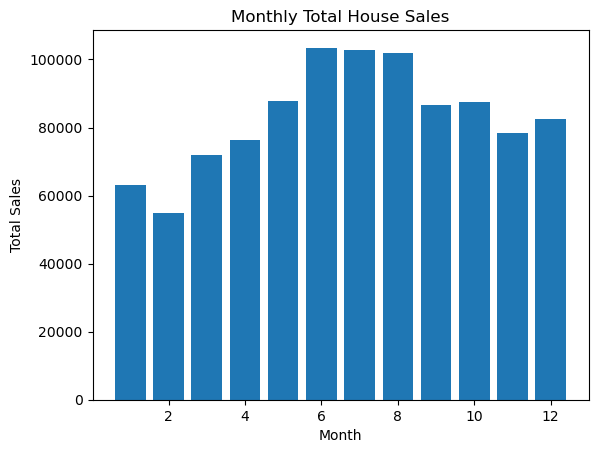

In [187]:
monthly_houses_sold = houses_sold.groupby('Month')['HousesSold'].sum()
plt.bar(monthly_houses_sold.index, monthly_houses_sold.values)
plt.title("Monthly Total House Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

The most popular months for house sales have been identified based on total sales

Analyze yearly house sales

In [188]:
yearly_sales = houses_sold.groupby('Year')['HousesSold'].sum()

# Find the year with the most houses sold
most_sold_year = yearly_sales.nlargest(1)

# Display the year with the most houses sold
print("Year with the Most Houses Sold:", most_sold_year.index[0])
print("Total Houses Sold:", most_sold_year.iloc[0])


Year with the Most Houses Sold: 2005.0
Total Houses Sold: 79566


In [189]:
least_sold_year = yearly_sales.nsmallest(2).idxmax()
print("Year with the Second-to-Least Houses Sold:", least_sold_year)
print("Total Houses Sold:", yearly_sales[least_sold_year])

Year with the Second-to-Least Houses Sold: 2001.0
Total Houses Sold: 14291


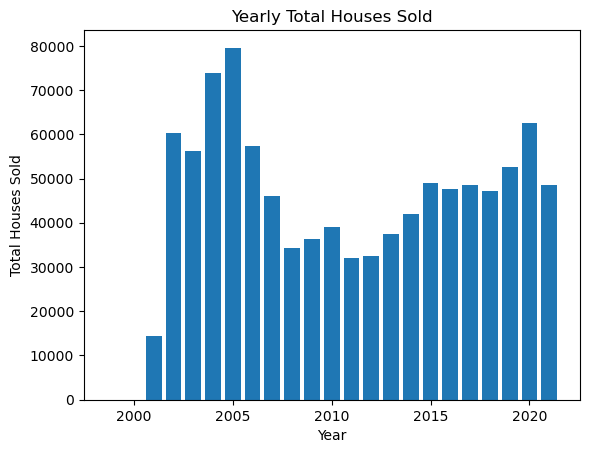

In [190]:
plt.bar(yearly_sales.index, yearly_sales.values)
plt.title("Yearly Total Houses Sold")
plt.xlabel("Year")
plt.ylabel("Total Houses Sold")
plt.show()

In [191]:
most_sold_month_per_year = houses_sold.sort_values('HousesSold', ascending=False).drop_duplicates('Year')
most_sold_month_per_year = most_sold_month_per_year.sort_values('Year')
most_sold_month_per_year

,Year,Month,HousesSold
0,1999.0,4.0,1
3,2001.0,10.0,5250
12,2002.0,7.0,6323
24,2003.0,7.0,6281
35,2004.0,6.0,7674
47,2005.0,6.0,8791
61,2006.0,8.0,5854
72,2007.0,7.0,4948
83,2008.0,6.0,3535
100,2009.0,11.0,4197


Identified years with most and least houses sold

Analyze the average cost of houses sold per year from 2001 to 2015

In [192]:
cost_data = housing_df[(housing_df['List Year'] >= 2001) & (housing_df['List Year'] <= 2015)]
avg_price_per_year = cost_data.groupby('List Year')['Sale Amount'].mean()
avg_price_per_year

List Year
2001    246235.035160
2002    296357.123706
2003    327217.932922
2004    380297.014169
2005    364030.126084
2006    475379.225385
2007    435713.379734
2008    325831.792393
2009    355250.327162
2010    331657.472575
2011    391684.320747
2012    395477.676013
2013    413516.239641
2014    401421.941220
2015    345883.763949
Name: Sale Amount, dtype: float64

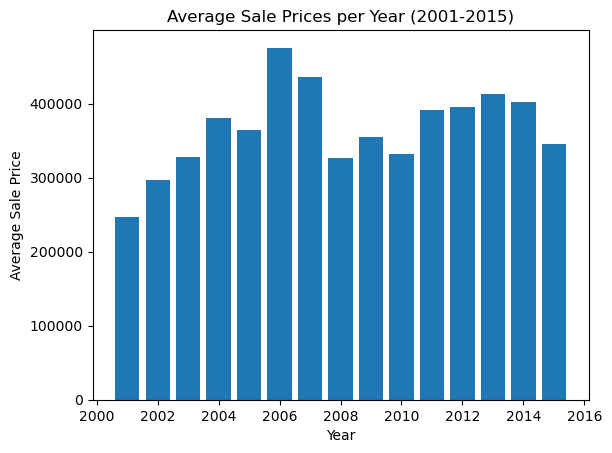

In [193]:
plt.bar(avg_price_per_year.index, avg_price_per_year.values)
plt.title("Average Sale Prices per Year (2001-2015)")
plt.xlabel("Year")
plt.ylabel("Average Sale Price")
plt.show()

In [194]:
years_train = avg_price_per_year.index.values.reshape(-1, 1)
avg_prices_train = avg_price_per_year.values
linear_regression_model = LinearRegression()
linear_regression_model.fit(years_train, avg_prices_train)
years_to_predict = np.arange(2016, 2021).reshape(-1, 1)
predicted_prices_next_years = linear_regression_model.predict(years_to_predict)

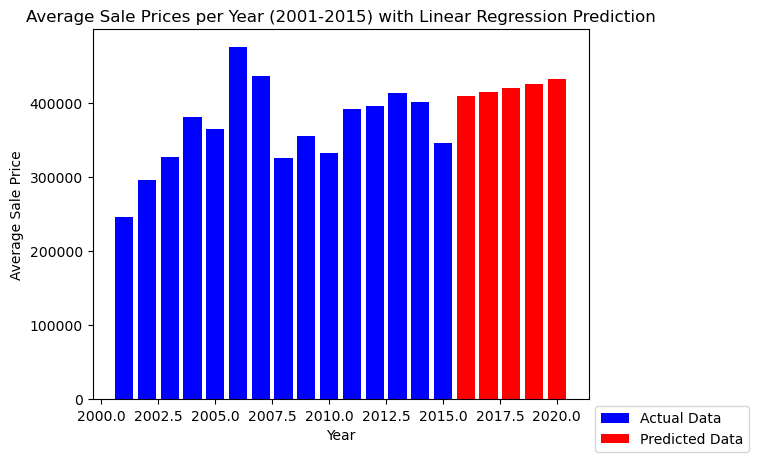

In [195]:
plt.bar(avg_price_per_year.index, avg_price_per_year.values, label="Actual Data", color='blue')
plt.bar(years_to_predict.flatten(), predicted_prices_next_years, label="Predicted Data", color='red')
plt.title("Average Sale Prices per Year (2001-2015) with Linear Regression Prediction")
plt.xlabel("Year")
plt.ylabel("Average Sale Price")
plt.legend(loc='upper left', bbox_to_anchor=(1, 0))
plt.show()

In [196]:
cost_data2 = housing_df[(housing_df['List Year'] >= 2016) & (housing_df['List Year'] <=2020)]
avg_price_per_year2 = cost_data2.groupby('List Year')['Sale Amount'].mean()
avg_price_per_year2

List Year
2016    507761.249272
2017    393251.314693
2018    383727.664935
2019    420296.971308
2020    604963.871051
Name: Sale Amount, dtype: float64

In [197]:
mean_actual = np.mean(avg_price_per_year2)
numerator = np.sum((avg_price_per_year2 - predicted_prices_next_years)**2)
denominator = np.sum((avg_price_per_year2 - mean_actual)**2)
r_squared_manual = 1 - (numerator / denominator)

print(f'Manually calculated R-squared: {r_squared_manual}')

Manually calculated R-squared: -0.18389269837482525


Reasons for -R^2: Overfitting, outliers, data quality

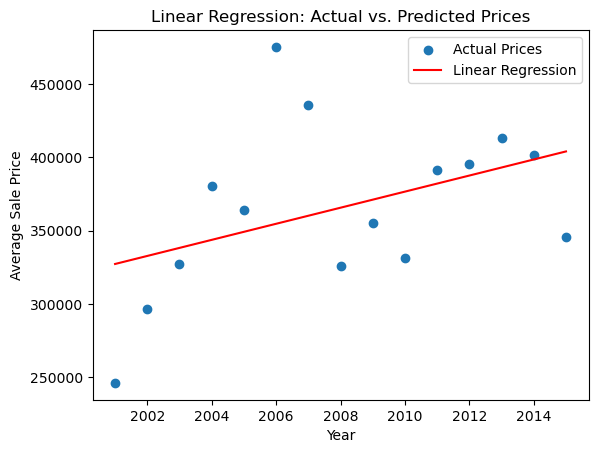

In [198]:
plt.scatter(years_train, avg_prices_train, label='Actual Prices')
plt.plot(years_train, linear_regression_model.predict(years_train), color='red', label='Linear Regression')
plt.title('Linear Regression: Actual vs. Predicted Prices')
plt.xlabel('Year')
plt.ylabel('Average Sale Price')
plt.legend()
plt.show()

Linear regression is not an appropriate model for data

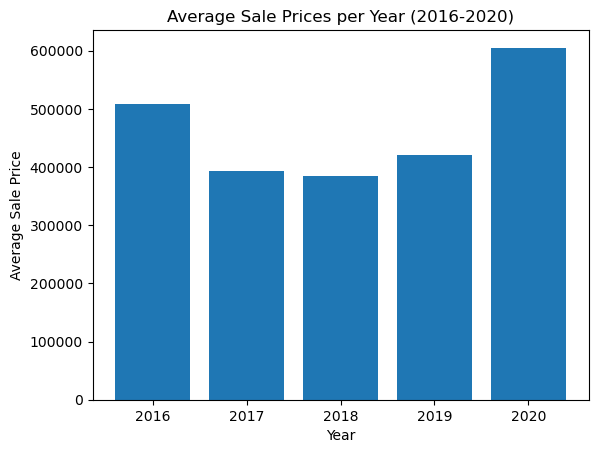

In [199]:
plt.bar(avg_price_per_year2.index, avg_price_per_year2.values)
plt.title('Average Sale Prices per Year (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Average Sale Price')
plt.show()

Correct data of years 2016-2020

To conclude the analysis of housing prices from 2001-2020 there are peaks and lows in months for house sales. The peak month to sell houses is June. The low month is February. In 2005 the number of houses sold increased due to the decrease in average home cost. When predicting housing prices other methods than linear regression should be considered such as decision trees and random forests or polynominal regression.

Display types of property

In [200]:
property_type_sales = housing_df.groupby('Property Type').size().reset_index(name='TotalSales')
print(property_type_sales)

     Property Type  TotalSales
0       Apartments         486
1       Commercial        1981
2            Condo      105420
3      Four Family        2150
4       Industrial         228
5   Public Utility           5
6      Residential       60728
7    Single Family      401612
8     Three Family       12586
9       Two Family       26408
10     Vacant Land        3163


In [201]:
property_type_sales = housing_df.groupby('Property Type').size().reset_index(name='TotalSales')
property_type_sales_sorted = property_type_sales.sort_values(by='TotalSales', ascending=False)
most_sold_property = property_type_sales_sorted.iloc[0]['Property Type']
print("Most Sold Property Type:", most_sold_property)

Most Sold Property Type: Single Family


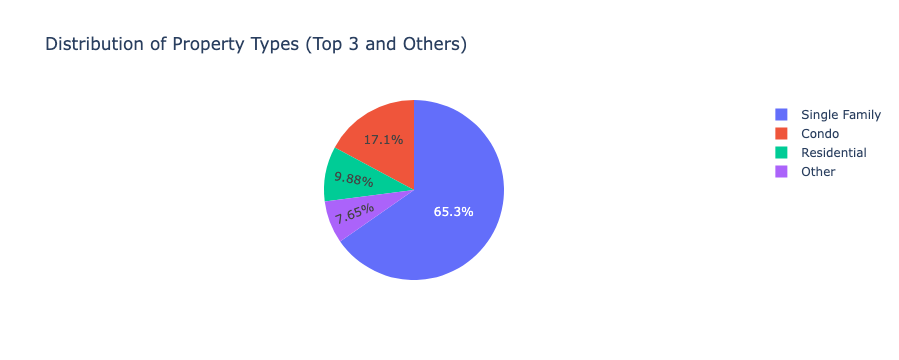

In [202]:
top_3_property_types = property_type_sales_sorted.head(3)
other_property_types = property_type_sales_sorted.iloc[3:]
other_total_sales = other_property_types['TotalSales'].sum()
grouped_data = pd.concat([top_3_property_types, pd.DataFrame({'Property Type': ['Other'], 'TotalSales': [other_total_sales]})])
fig = px.pie(grouped_data, values='TotalSales', names='Property Type', title='Distribution of Property Types (Top 3 and Others)')
fig.show()

Determined most sold property type

Analyze median price of houses on main roads

In [203]:
merge_df['On_Main_Road'] = merge_df['ROAD_TYPE'].str.contains('M', case=False, regex=True)
median_prices = merge_df.groupby('On_Main_Road')['Sale Amount'].median()
median_prices

On_Main_Road
False    189000.0
True     195000.0
Name: Sale Amount, dtype: float64

In [204]:
merge_df['ROAD_TYPE']

0       XR
1        M
2       XR
3       ER
4        M
        ..
1217     M
1218     M
1219    TR
1220     M
1221    XR
Name: ROAD_TYPE, Length: 1222, dtype: object

XR: expressway
M: main road
ER: entry road
TR: through road

In [205]:
# calc % of homes on main road & in what towns are most home on main road

In [206]:
print(merge_df['On_Main_Road'].isnull().sum())

0


In [207]:
main_road_percentage = merge_df['On_Main_Road'].mean() * 100
print(f"Percentage of Homes on Main Road: {main_road_percentage:.2f}%")

Percentage of Homes on Main Road: 56.63%


In [208]:
towns_most_on_main_road = merge_df.groupby('Town')['On_Main_Road'].sum().sort_values(ascending=False)
most_on_main_road = towns_most_on_main_road.iloc[0]
print(f"\nTown(s) with the Most Homes on Main Road:")
print(towns_most_on_main_road[towns_most_on_main_road == most_on_main_road])



Town(s) with the Most Homes on Main Road:
Town
Bridgeport    375
Name: On_Main_Road, dtype: int64
